<a href="https://colab.research.google.com/github/sindhuja279/ML_Lab/blob/main/1BM22CS279_LAB9_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

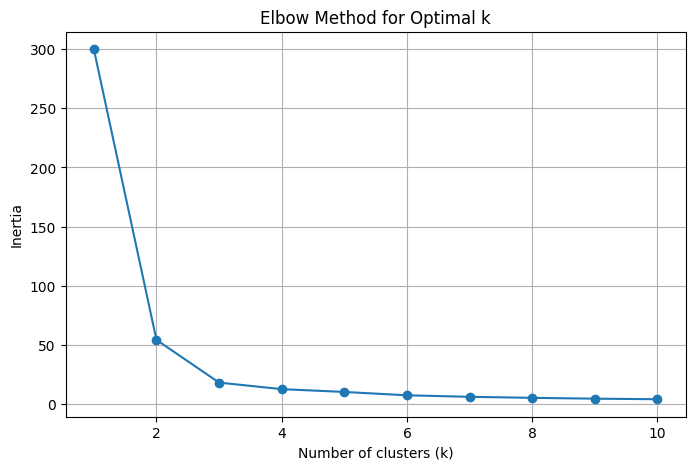

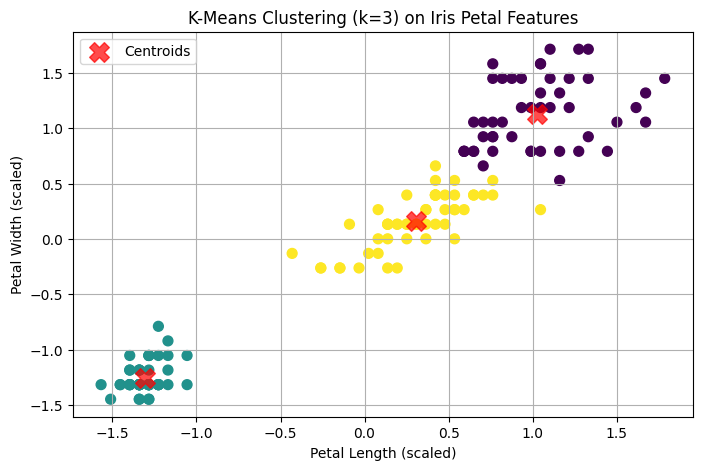

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select only petal length and width
X = df[['petal length (cm)', 'petal width (cm)']]

# Optional: Scale the features (important for distance-based algorithms like K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# From the elbow plot, we choose k = 3 (typical for Iris dataset)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original data
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title('K-Means Clustering (k=3) on Iris Petal Features')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend()
plt.grid(True)
plt.show()
